<a href="https://colab.research.google.com/github/ragini-dwivedi/Yelp-Dataset/blob/main/Yathukulan/using_scikit_surprise_lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing surprise on colab

In [67]:
!pip install scikit-surprise

In [68]:
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

from surprise import Reader, Dataset
# from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor, BaselineOnly, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD, SVDpp, NMF, SlopeOne, CoClustering

from surprise import accuracy
from surprise.accuracy import rmse

from surprise.model_selection import train_test_split

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
cd '/content/drive/Shareddrives/Yelp_dataset/restuarant_reviews/by_city/'

/content/drive/Shareddrives/Yelp_dataset/restuarant_reviews/by_city


In [71]:
ls

hashed_reviews_ph.csv                    modelinput_reviews_tr.csv
modelinput_phoenix_restaurant_stars.csv  reviews_allcities.csv
modelinput_reviews_allcities.csv         reviews_lv.csv
modelinput_reviews_lv.csv                reviews_ph.csv
modelinput_reviews_ph.csv                reviews_tr.csv


In [148]:
def run_all_models (dataset,algos=[SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()],measures=['RMSE'] ):
  surprise_reader = Reader(rating_scale=(1, 5)) # 1 to 5 rating system
  inp = Dataset.load_from_df(dataset[:10000], surprise_reader) #memory overflow crash if rows>10k

  performance = []

  for each_algo in algos:
    results = cross_validate(each_algo, inp, measures=measures, cv=5, verbose=False)

    temp = pd.DataFrame.from_dict(results).mean(axis=0)
    temp = temp.append(pd.Series([str(each_algo).split(' ')[0].split('.')[-1]], index=['Algorithms']))
    performance.append(temp)

  to_ret =  pd.DataFrame(performance).set_index('Algorithms')
  return to_ret[['test_rmse']]

In [73]:
dataset_ph = pd.read_csv('/content/drive/Shareddrives/Yelp_dataset/restuarant_reviews/by_city/modelinput_reviews_ph.csv').sort_values('business_id')
dataset_lv = pd.read_csv('/content/drive/Shareddrives/Yelp_dataset/restuarant_reviews/by_city/modelinput_reviews_lv.csv').sort_values('business_id')
dataset_tr = pd.read_csv('/content/drive/Shareddrives/Yelp_dataset/restuarant_reviews/by_city/modelinput_reviews_tr.csv').sort_values('business_id')
dataset_all = pd.read_csv('/content/drive/Shareddrives/Yelp_dataset/restuarant_reviews/by_city/modelinput_reviews_allcities.csv').sort_values('business_id', ascending=False)

In [74]:
dataset_ph

,user_id,business_id,stars
83931,28282,0,5
55027,126205,0,4
58489,34263,0,5
50060,142907,0,4
46757,137869,0,3
...,...,...,...
322708,4556,4220,4
292978,144919,4220,5
294573,125897,4220,2
300853,105701,4220,5


In [75]:
dataset_ph.shape


(511055, 3)

In [76]:
new_algos = [SVD(), KNNBaseline(), BaselineOnly(), KNNBasic(),  SlopeOne(), CoClustering(), NMF(), NormalPredictor() ]

In [77]:
performance_ph = run_all_models(dataset_ph,new_algos)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

In [78]:
performance_lv = run_all_models(dataset_lv,new_algos)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

In [79]:
performance_tr = run_all_models(dataset_tr,new_algos)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

In [80]:
performance_all = run_all_models(dataset_all,new_algos)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

In [81]:
rmse_perf = performance_ph.copy()
rmse_perf.rename(columns={"test_rmse": "Phoenix"},inplace=True)
rmse_perf

,Phoenix
Algorithms,
SVD,1.251315
KNNBaseline,1.277484
BaselineOnly,1.248602
KNNBasic,1.361029
SlopeOne,1.393185
CoClustering,1.383370
NMF,1.399734
NormalPredictor,1.762925


In [82]:
rmse_perf['Toronto'] =performance_tr['test_rmse']
rmse_perf['Las Vegas'] =performance_lv['test_rmse']
rmse_perf['All'] =performance_all['test_rmse']
rmse_perf

,Phoenix,Toronto,Las Vegas,All
Algorithms,,,,
SVD,1.251315,1.167982,1.240133,1.285574
KNNBaseline,1.277484,1.197250,1.256531,1.298270
BaselineOnly,1.248602,1.166532,1.239987,1.292188
KNNBasic,1.361029,1.257394,1.328934,1.402572
SlopeOne,1.393185,1.323482,1.355343,1.413387
CoClustering,1.383370,1.301124,1.350259,1.413631
NMF,1.399734,1.307556,1.353372,1.409994
NormalPredictor,1.762925,1.647980,1.725914,1.822825


In [83]:
rmse_perf.sort_values('All')

,Phoenix,Toronto,Las Vegas,All
Algorithms,,,,
SVD,1.251315,1.167982,1.240133,1.285574
BaselineOnly,1.248602,1.166532,1.239987,1.292188
KNNBaseline,1.277484,1.197250,1.256531,1.298270
KNNBasic,1.361029,1.257394,1.328934,1.402572
NMF,1.399734,1.307556,1.353372,1.409994
SlopeOne,1.393185,1.323482,1.355343,1.413387
CoClustering,1.383370,1.301124,1.350259,1.413631
NormalPredictor,1.762925,1.647980,1.725914,1.822825


Text(66.5, 0.5, 'Algorithms')

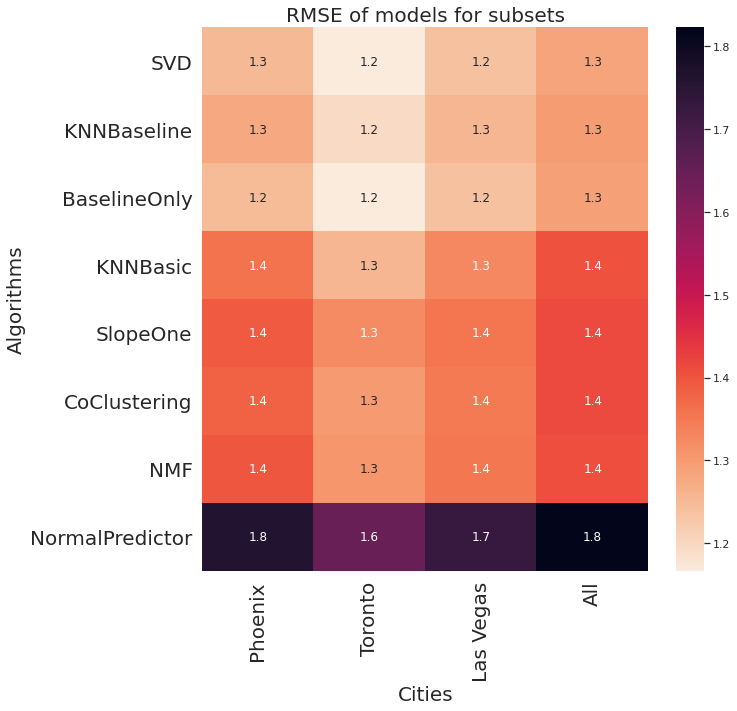

In [157]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
ax = sns.heatmap(rmse_perf,cmap='rocket_r',annot=True)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.title('RMSE of models for subsets', fontsize=20)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('Algorithms',fontsize=20)

In [134]:
performance_all_allmodels = run_all_models(dataset_all)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Don

In [135]:
#performance_all_allmodels.reset_index(inplace=True)
performance_all_allmodels

,test_rmse
Algorithms,
SVD,1.283127
SVDpp,1.300129
SlopeOne,1.418207
NMF,1.410936
NormalPredictor,1.829063
KNNBaseline,1.294304
KNNBasic,1.402846
KNNWithMeans,1.414676
KNNWithZScore,1.417027


In [142]:
performance_all_allmodels = performance_all_allmodels.sort_values('test_rmse').reset_index()

<BarContainer object of 11 artists>

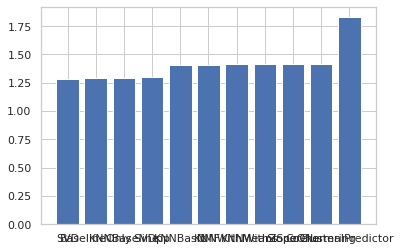

In [143]:
plt.bar(performance_all_allmodels['Algorithms'],performance_all_allmodels['test_rmse'])

In [144]:
performance_all_allmodels['test_rmse']

0     1.283127
1     1.292614
2     1.294304
3     1.300129
4     1.402846
5     1.410936
6     1.414676
7     1.417027
8     1.418207
9     1.418964
10    1.829063
Name: test_rmse, dtype: float64

In [145]:
plt.bar(performance_all_allmodels['test_rmse'])

TypeError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


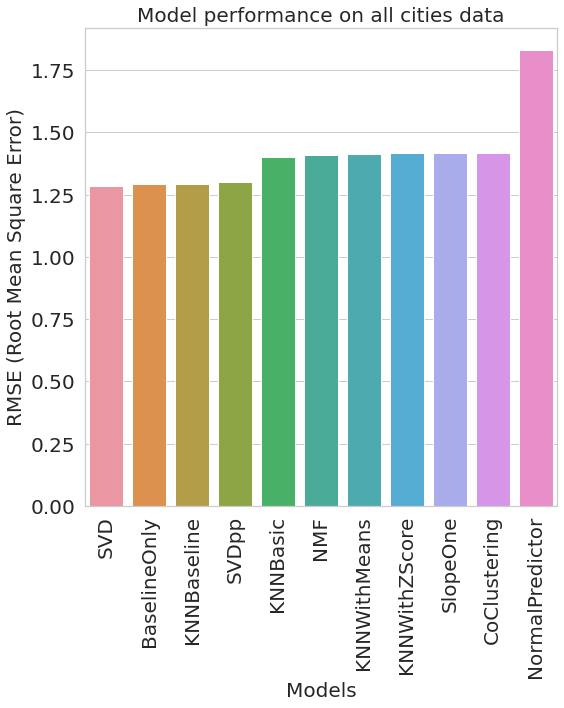

In [150]:
plt.figure(figsize=(8,10))
#plt.bar(dataset, RMSE_vals)
sns.set(style="whitegrid")
sns.barplot(performance_all_allmodels['Algorithms'],performance_all_allmodels['test_rmse'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.title('Model performance on all cities data', fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.ylabel('RMSE (Root Mean Square Error)',fontsize=20)
plt.tight_layout()

In [151]:
def run_all_models_mae (dataset,algos=[SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]):
  surprise_reader = Reader(rating_scale=(1, 5)) # 1 to 5 rating system
  inp = Dataset.load_from_df(dataset[:10000], surprise_reader) #memory overflow crash if rows>10k

  performance = []

  for each_algo in algos:
    results = cross_validate(each_algo, inp, measures=['MAE'], cv=5, verbose=False)

    temp = pd.DataFrame.from_dict(results).mean(axis=0)
    temp = temp.append(pd.Series([str(each_algo).split(' ')[0].split('.')[-1]], index=['Algorithms']))
    performance.append(temp)

  to_ret =  pd.DataFrame(performance).set_index('Algorithms')
  return to_ret[['test_mae']]

In [152]:
performance_ph_mae = run_all_models_mae(dataset_ph,new_algos)
performance_lv_mae = run_all_models_mae(dataset_lv,new_algos)
performance_tr_mae = run_all_models_mae(dataset_tr,new_algos)
performance_all_mae = run_all_models_mae(dataset_all,new_algos)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

In [153]:
mae_perf = performance_ph_mae.copy()
mae_perf.rename(columns={"test_rmse": "Phoenix"},inplace=True)

mae_perf['Toronto'] =performance_tr_mae['test_mae']
mae_perf['Las Vegas'] =performance_lv_mae['test_mae']
mae_perf['All'] =performance_all_mae['test_mae']
mae_perf

,test_mae,Toronto,Las Vegas,All
Algorithms,,,,
SVD,1.008946,0.938879,1.001024,1.045911
KNNBaseline,1.019311,0.958227,0.997801,1.045996
BaselineOnly,1.009436,0.938374,1.004889,1.057701
KNNBasic,1.102297,1.031992,1.076528,1.182583
SlopeOne,1.122165,1.076090,1.092066,1.188244
CoClustering,1.109806,1.059034,1.094345,1.195236
NMF,1.139584,1.081116,1.098339,1.190735
NormalPredictor,1.379136,1.308573,1.359377,1.449050


In [154]:
mae_perf.sort_values('All')

,test_mae,Toronto,Las Vegas,All
Algorithms,,,,
SVD,1.008946,0.938879,1.001024,1.045911
KNNBaseline,1.019311,0.958227,0.997801,1.045996
BaselineOnly,1.009436,0.938374,1.004889,1.057701
KNNBasic,1.102297,1.031992,1.076528,1.182583
SlopeOne,1.122165,1.076090,1.092066,1.188244
NMF,1.139584,1.081116,1.098339,1.190735
CoClustering,1.109806,1.059034,1.094345,1.195236
NormalPredictor,1.379136,1.308573,1.359377,1.449050


Text(66.5, 0.5, 'Algorithms')

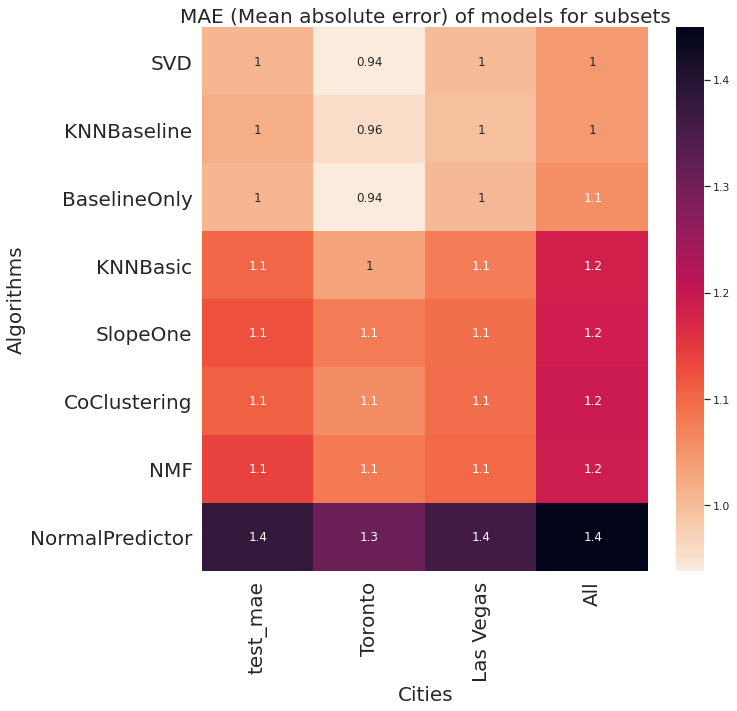

In [156]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
ax = sns.heatmap(mae_perf,cmap='rocket_r',annot=True)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.title('MAE (Mean absolute error) of models for subsets', fontsize=20)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('Algorithms',fontsize=20)